In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [3]:
# This creates a quantum circuit with n qubits
n = 8
qc_output = QuantumCircuit(n)

### Encode

Now that we have a quantum circuit, we have to input data somehow. The initial state (as
shown in Chapter 1) is for all bits to be |0>. In order to set an input, we use the X gate.
The explanation done below, however this is the first step in all quantum circuits

In [4]:
# Here, we add a new step, encoding digits.
# The 'X' Gate is the equivilent of a NOT gate in classical Boolean computation.
# It simply converts a |0> to a |1>
# The 7 in the below line of code corresponds to the 7th qbit.
qc_output.x(7)

# A quick note: qiskit notates the 0th bit as the right-most digit when outputted. Thus,
# the 7 is the first digit

In [5]:
# Measure the circuit to collapse the quantum states
qc_output.measure_all()

In [6]:
# Draws the quantum output
qc_output.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

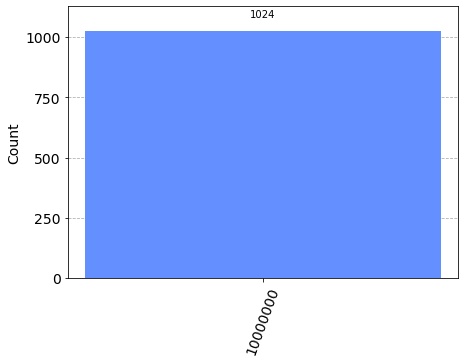

In [7]:
# aer_simulator is a type of quantum kernal which actually handles the simulation
# of bits etc. There are some more options, but this is the default
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)


In [17]:
# Let's create a quick utility to measure the output of our circuit.
def measure(circuit):
    sim = Aer.get_backend('aer_simulator')
    result = sim.run(circuit).result()
    counts = result.get_counts()
    plot_histogram(counts) 
    return counts

Now, in order to add numbers, we must implement some interaction between qubits. The form
which this manifests is (in our adding example) would be the Controlled-NOT (CNOT) gate.
This is the quantum analogue of an XOR, as the function for a qubit to flip iff the control
qubit is on. In qiskit, the name is `cx`.

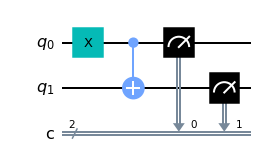

In [18]:
# Create a two-qubit circuit.
# The syntax for the below command is for the first parameters to be the number of qubits,
# and the second to be the number of classical bits
# Internally these are a list of QuantumRegister and/or ClassicalRegister objects
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1) # This is our CNOT, linking q_0 as the control, and q_1 as the target

# Now we can measure the outputs.
# The syntax for the measure statements are qc.measure(qubit, cbit)
# where the first corrosponds to the qubit to measure, while the second to the classical bit
# into which to the result is stored
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')
# qc.measure_all()
# qc.draw(initial_state=False, cregbundle=False, output='mpl')

In [19]:
measure(qc)

{'11': 1024}

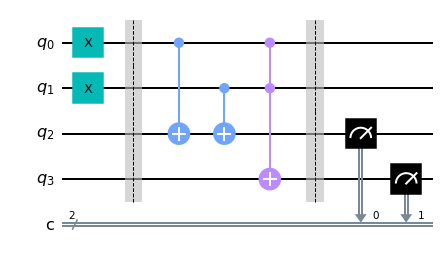

In [25]:
# Four qubits, and two classical bits (for outputs)
qc_ha = QuantumCircuit(4,2)

# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.

# Fancy new construct for dividing our circuit by logical groups. E.g., by Encode, Compute, Measure
qc_ha.barrier()

# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
# Hang on! what's this new gate?
# A: Toffoli. It's just like a CNOT, however it flips the target qubit iff the two control
# qubits are in state |1>
qc_ha.ccx(0,1,3)

qc_ha.barrier()

# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

In [23]:
measure(qc_ha)

{'10': 1024}